# Ukraine Russia War Twitter Sentiment Analysis using Python

Many countries are supporting Ukraine by introducing economic sanctions on Russia. There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. In this notebook, I will take you through the task of Ukraine and Russia war Twitter Sentiment Analysis using Python.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/russia-vs-ukraine-tweets-datasetdaily-updated/filename.csv


In [2]:
data = pd.read_csv("/kaggle/input/russia-vs-ukraine-tweets-datasetdaily-updated/filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1601019178244534272  1600960230216507393  2022-12-09 01:01:32 UTC   
1  1601019178114117632  1600960230216507393  2022-12-09 01:01:32 UTC   
2  1601019177346928640  1600788582318604288  2022-12-09 01:01:32 UTC   
3  1601019176973307905  1600855951426220032  2022-12-09 01:01:31 UTC   
4  1601019176285802501  1600938427025088512  2022-12-09 01:01:31 UTC   

         date      time  timezone              user_id         username  \
0  2022-12-09  01:01:32         0   950033870187003904   maplesauce8213   
1  2022-12-09  01:01:32         0   950033870187003904   maplesauce8213   
2  2022-12-09  01:01:32         0            173613925    rowerowadroga   
3  2022-12-09  01:01:31         0  1587783511532093440  danawad75686491   
4  2022-12-09  01:01:31         0  1596265206791168000    jonustoewsart   

            name place  ... geo source user_rt_id user_rt retweet_id  \
0     Maplesauce   NaN  ... NaN    NaN      

In [3]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
data = data[["username", "tweet", "language"]]

In [5]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [6]:
data["language"].value_counts()

en     9524
pt      141
it       89
qme      41
in       41
ja       40
es       40
ru       19
und      15
fi        9
ca        8
de        6
ro        4
fr        3
zh        3
cs        2
nl        2
uk        2
cy        2
qht       2
qam       2
tr        2
zxx       1
th        1
tl        1
Name: language, dtype: int64

Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

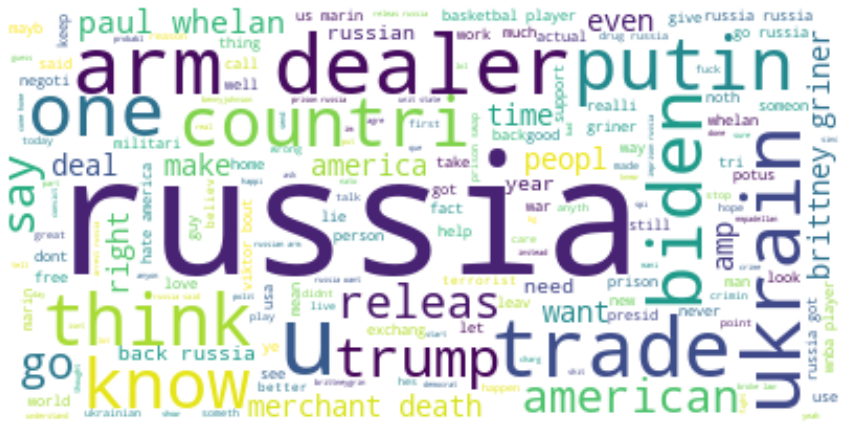

In [8]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0   edgarallanmo eh wouldnt sure russia middl war...     0.126     0.256   
1   edgarallanmo eh wouldnt sure russia middl war...     0.126     0.256   
2  embassyofrussia mfarussia pmsimferopol russian...     0.000     0.000   
3        mmpadellan  left us one russia want bad guy     0.120     0.324   
4                      loffredojeremi move russia 🧳🛩     0.000     0.000   

   Neutral  
0    0.618  
1    0.618  
2    1.000  
3    0.556  
4    1.000  


Now let’s have a look at the most frequent words used by people with positive sentiments.

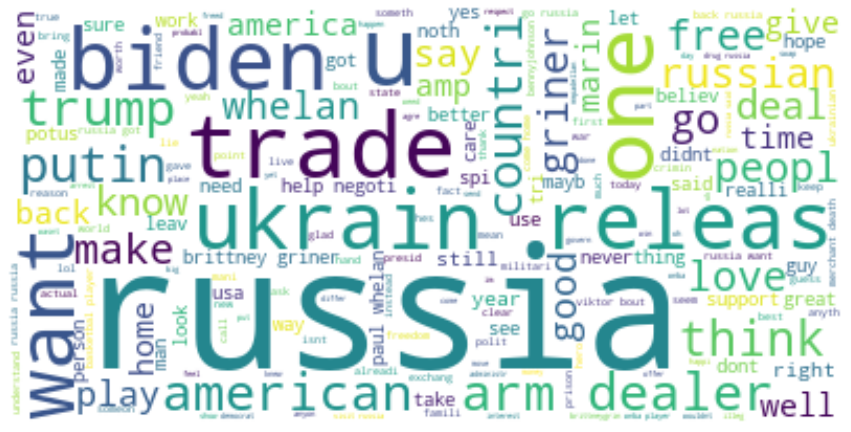

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most frequent words used by people with negative sentiments.

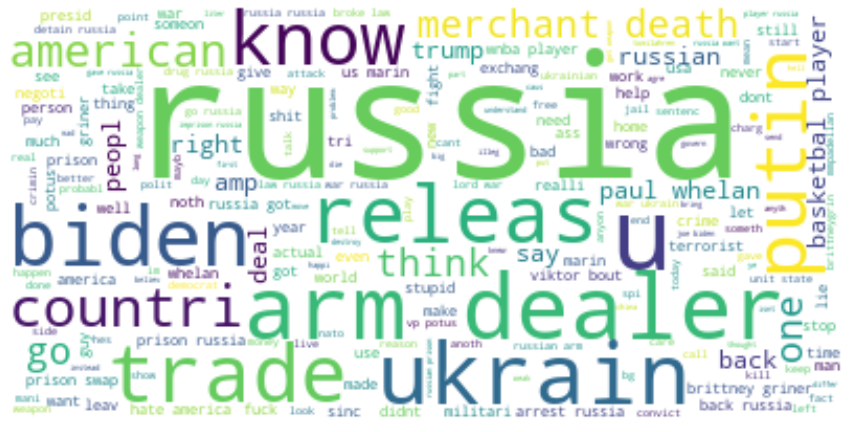

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()